## Data Analysis and Visualization Plan

### Objectives
- Understand the distribution of key variables in the `county_aggregation` dataset.
- Identify any correlations between the indicators of food deserts and socio-economic factors.

### Methods
- **Descriptive Statistics**: Summarize central tendencies, dispersion, and shape of distributions.
- **Visualizations**:
  - Histograms for distribution of individual variables.
  - Scatter plots to explore potential correlations.
  - Heatmaps for correlation matrix.

### Hypotheses
- There is a significant correlation between poverty rates and the classification of areas as food deserts.


In [18]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import warnings
warnings.filterwarnings('ignore')

# Read in data
county_agg = pd.read_csv('../data/countyagg.csv')
county_agg.head()

,State,County,CensusTract,Pop2010,OHU2010,PovertyRate,MedianFamilyIncome,LowIncomeTracts,LILATracts_1And10,LALOWI1_10,...,PctKids,PctSeniors,PctWhite,PctBlack,PctAsian,PctHispanic,is_food_desert,StateFIPS,CountyFIPS,FIPS
0,Alabama,Autauga County,1001020100,54571,20221,16.125000,69337.500000,5,5,7106.0,...,26.777959,11.995382,78.530721,17.670558,0.868593,2.400542,1,10,10,10010
1,Alabama,Baldwin County,1003010100,182265,73180,11.845161,72665.741935,7,4,14468.0,...,22.987408,16.771185,85.673607,9.384687,0.739582,4.384824,1,10,30,10030
2,Alabama,Barbour County,1005950100,27457,9820,29.311111,44792.444444,8,4,2864.0,...,21.906982,14.236807,48.002331,46.891503,0.389700,5.051535,1,10,59,10059
3,Alabama,Bibb County,1007010001,22915,7953,12.175000,60645.500000,1,0,102.0,...,22.696923,12.681650,75.849880,22.024875,0.096007,1.771765,0,10,70,10070
4,Alabama,Blount County,1009050101,57322,21578,14.855556,60437.666667,3,0,1440.0,...,24.608353,14.722096,92.578766,1.327588,0.204110,8.070200,0,10,90,10090


In [2]:
county_agg.isnull().sum()

State                 0
County                0
CensusTract           0
Pop2010               0
OHU2010               0
PovertyRate           1
MedianFamilyIncome    2
LowIncomeTracts       0
LILATracts_1And10     0
LALOWI1_10            0
TractSNAP             0
TractHUNV             0
lapop1                0
lapop10               0
TractKids             0
TractSeniors          0
TractWhite            0
TractBlack            0
TractAsian            0
TractHispanic         0
PctHUNV               0
PctKids               0
PctSeniors            0
PctWhite              0
PctBlack              0
PctAsian              0
PctHispanic           0
is_food_desert        0
StateFIPS             0
CountyFIPS            0
FIPS                  0
dtype: int64

In [3]:
county_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               3142 non-null   object 
 1   County              3142 non-null   object 
 2   CensusTract         3142 non-null   int64  
 3   Pop2010             3142 non-null   int64  
 4   OHU2010             3142 non-null   int64  
 5   PovertyRate         3141 non-null   float64
 6   MedianFamilyIncome  3140 non-null   float64
 7   LowIncomeTracts     3142 non-null   int64  
 8   LILATracts_1And10   3142 non-null   int64  
 9   LALOWI1_10          3142 non-null   float64
 10  TractSNAP           3142 non-null   float64
 11  TractHUNV           3142 non-null   float64
 12  lapop1              3142 non-null   float64
 13  lapop10             3142 non-null   float64
 14  TractKids           3142 non-null   float64
 15  TractSeniors        3142 non-null   float64
 16  TractW

## Data Exploration (Prior to Food Desert Classification)

### Visualization 1: Distribution of Poverty Rates
The first step is to understand the distribution of poverty rates across the different counties. This will help us understand the spread of poverty rates and identify any outliers.

### Visualization 2: Distribution of Median Household Income
Next, we will explore the distribution of median household income to understand the spread of income levels across the counties.

### Visualization 3: Heatmap of Correlation Matrix
Finally, we will create a heatmap of the correlation matrix to identify any potential relationships between the indicators of food deserts and socio-economic factors.

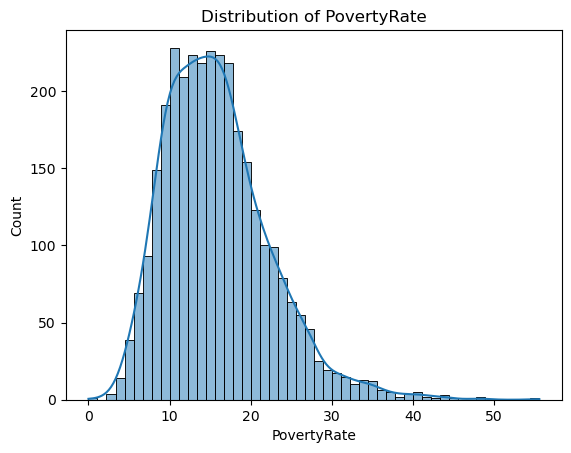

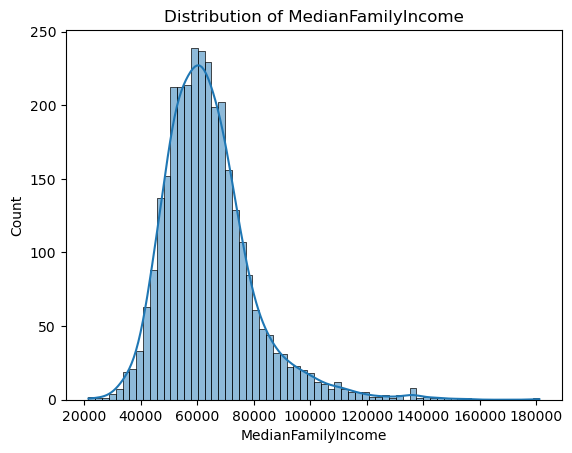

In [16]:
# Distribution of key features
for column in ['PovertyRate', 'MedianFamilyIncome']:
    sns.histplot(county_agg[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

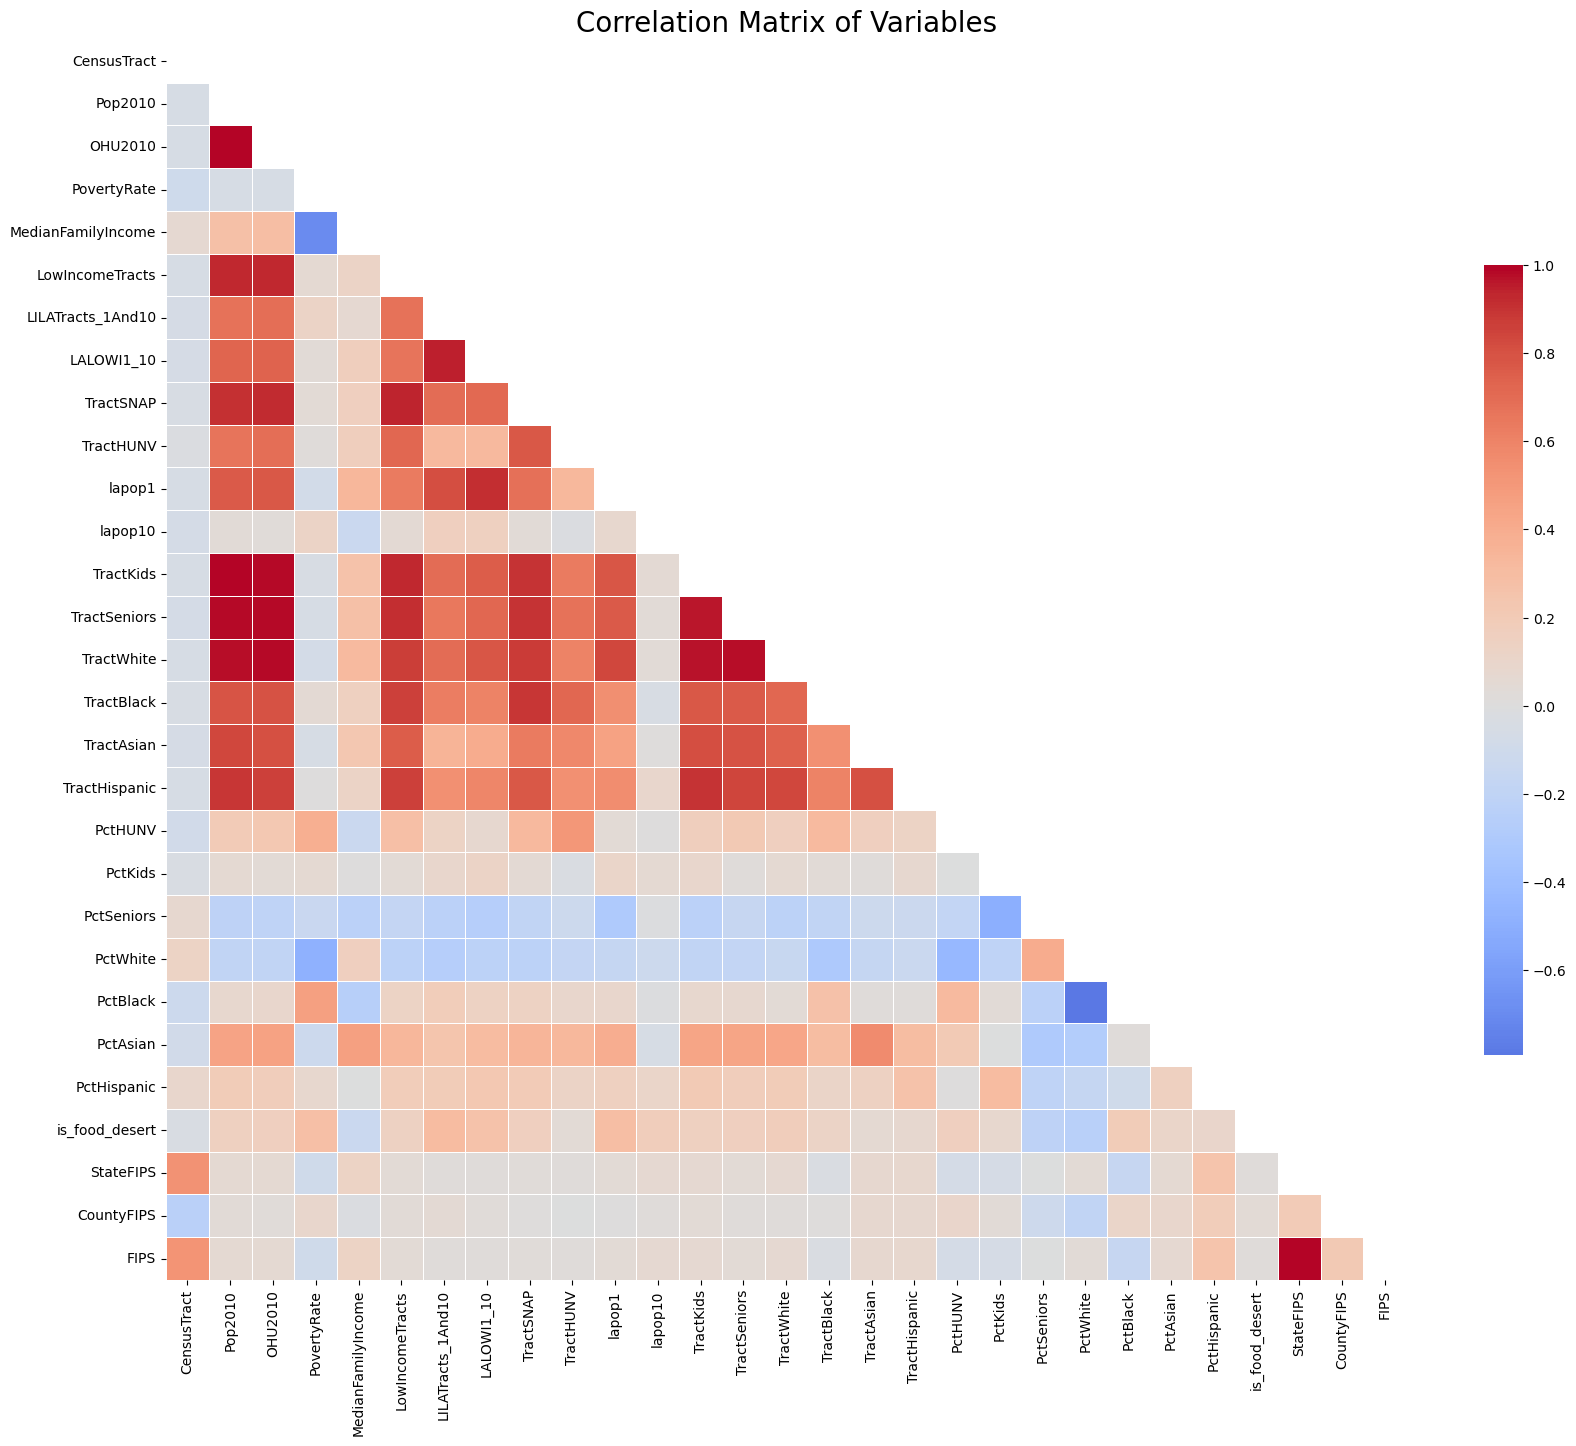

In [14]:
# Drop non-numeric columns
numeric_columns = county_agg.select_dtypes(include=['float64', 'int64']).columns
numeric_df = county_agg[numeric_columns]

# Generated a mask for the upper triangle
mask = np.triu(np.ones_like(numeric_df.corr(), dtype=bool))

fig, ax = plt.subplots(figsize=(20, 20)) 

# Create a heatmap
sns.heatmap(numeric_df.corr(), mask=mask, annot=False, cmap='coolwarm', 
            vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5},
            fmt=".2f", ax=ax) #Ref: https://seaborn.pydata.org/generated/seaborn.heatmap.html

# Improve the layout
plt.subplots_adjust(top=0.9)
plt.title('Correlation Matrix of Variables', fontsize=20)
ax.tick_params(labelsize=10) 

plt.show()

### Interpretation of Results

#### Distribution of Poverty Rate
The histogram of Poverty Rate shows a right-skewed distribution, indicating that a majority of counties have lower poverty rates, with fewer counties experiencing high poverty rates.

#### Heatmap Interpretation

This heatmap displays the lower half of the correlation matrix for the variables in the `county_aggregation` dataset. Displaying only the lower half as the matrix is symmetrical and the upper half would provide redundant information.

- **Color Interpretation**: The color scale ranges from dark red (strong positive correlation) to dark blue (strong negative correlation). Lighter colors indicate weaker correlations.

- **Interpreting Correlations**: The strong correlations are indicated by darker shades. For example, if two variables show a dark red color, they have a strong positive correlation, suggesting that as one increases, the other also tends to increase.

- **Diagonal**: The diagonal line, which is not shown, represents the correlation of each variable with itself, which would always be 1.

This visualization helps quickly identify relationships that are worth investigating further through more detailed statistical analysis, while keeping the chart uncluttered by omitting the redundant upper half of the matrix.




## Data Visualizations

#### Visualization 1: Distribution of Median Family Income

The following histogram displays the distribution of Median Family Income across all counties. The mean income is marked with a red dashed line, allowing for a quick visual assessment of how many counties fall above or below the mean.

#### Visualization 2: Poverty Rates and Low-Access Indicators

This scatter plot examines the relationship between Poverty Rates and Low-Access Indicators across counties. Each point is colored according to the Median Family Income and sized proportionally to the population in 2010, providing a multi-dimensional view of the data.

#### Visualization 3: State-wise Low-Income and Low-Access Tracts

The bar plot below shows the prevalence of low-income and low-access tracts aggregated by state. States are sorted by the number of low-access tracts, highlighting which states have the highest prevalence of these tracts.


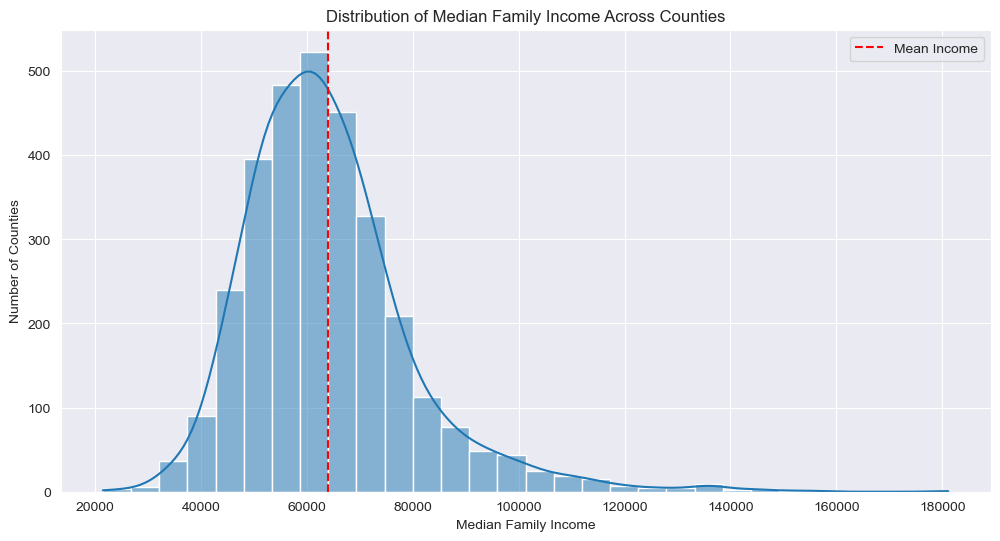

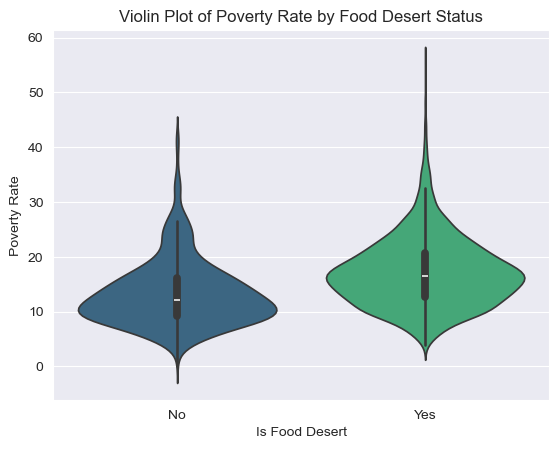

<Figure size 1200x600 with 0 Axes>

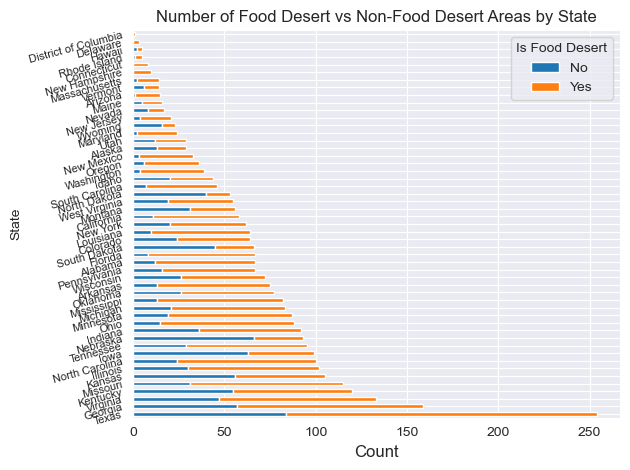

In [64]:
# Set the style of the plots
sns.set_style("darkgrid")

# Visualization 1: Distribution of Median Family Income across Counties
plt.figure(figsize=(12, 6))
sns.histplot(county_agg['MedianFamilyIncome'], bins=30, kde=True, palette='viridis')
plt.title('Distribution of Median Family Income Across Counties')
plt.xlabel('Median Family Income')
plt.ylabel('Number of Counties')
plt.axvline(county_agg['MedianFamilyIncome'].mean(), color='red', linestyle='--', label='Mean Income')
plt.legend()
plt.show()

# Visualization 2: Relationship between Poverty Rates and Food Deserts across Counties
sns.violinplot(x='is_food_desert', y='PovertyRate', data=county_agg, palette='viridis')
plt.title('Violin Plot of Poverty Rate by Food Desert Status')
plt.xlabel('Is Food Desert')
plt.ylabel('Poverty Rate')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

# Visualization 3: Horizontal Bar Chart of Food Desert Counts by State

food_desert_counts = county_agg.groupby('State')['is_food_desert'].value_counts().unstack()

# Calculate the total number of areas (food desert and non-food desert) for each state
food_desert_counts['Total'] = food_desert_counts.sum(axis=1)

# Sort the DataFrame based on the 'Total' column, in descending order
food_desert_counts_sorted = food_desert_counts.sort_values(by='Total', ascending=False)

# Drop the 'Total' column
food_desert_counts_sorted = food_desert_counts_sorted.drop(columns='Total')

plt.figure(figsize=(12, 6))
food_desert_counts_sorted.plot(kind='barh', stacked=True)
plt.title('Number of Food Desert vs Non-Food Desert Areas by State')
plt.xlabel('Count', fontsize=12)
plt.ylabel('State')
plt.yticks(fontsize=8, rotation=15)
plt.legend(title='Is Food Desert', labels=['No', 'Yes'])
plt.tight_layout()
plt.show();

### Interpretation of Results

#### Visualization 1: Distribution of Median Family Income Across Counties

The histogram depicts the distribution of median family incomes across counties. The distribution appears to be roughly normal, suggesting that median family income is evenly distributed among the counties in the dataset. The mean income is indicated by a red dashed line, which shows the central tendency of the dataset. This visualization helps to understand economic disparities and identify counties that fall significantly above or below the average income levels.


#### Visualization 2: Relationship between Poverty Rates and Food Desert Status

The violin plot provides a visual comparison of the poverty rate distribution between areas classified as food deserts ("Yes") and those that are not ("No"). Each "violin" represents the density estimation of the poverty rate for each classification.

Observations from the plot:
- Both classifications show a wide distribution of poverty rates, suggesting variability in economic conditions across counties.
- The distribution for non-food desert areas ("No") appears slightly narrower than that for food desert areas ("Yes"), indicating less variability in poverty rates among non-food desert areas.
- Food desert areas show a wider spread in poverty rates, which could suggest a higher degree of economic disparity within these regions.
- The thicker sections of the violins indicate a higher concentration of counties with those poverty rate values. Both categories have their thickest section at the lower end of the poverty rate spectrum, but the food desert areas have a significant presence extending towards higher poverty rates.
- There are visible tails at the upper end of the poverty rate spectrum for both categories, with the tail being more pronounced for food desert areas, indicating that some counties with very high poverty rates are classified as food deserts.


#### Visualization 3: Prevalence of Food Deserts and Non-Food Deserts by State

The bar plot ranks states by the prevalence of Food Deserts and Non-Food Deserts, providing a clear picture of which states face the greatest challenges in terms of food access. States are sorted in descending order, with Texas, Georgia, and Virginia showing the highest numbers of such tracts. This visualization highlights the states where interventions to improve food accessibility might be most needed, and can serve as a starting point for more in-depth analysis at the state level. 

Please keep in mind that Texas, California, and Florida are the most populous states in the US, so the high number of might be due to their large populations.
